# Machine Learning Assignment 2

### Assignment Objective:

In this assignment You will learn how to use all machine learning algorthms learned so far, this includes: KNN, Decision Tree, Random Forest (Bagging), Boosting (AdaBoost and XGBoost)

The dataset is for predicting lung diseases. The target is the last column "Level" that is a discrete value 'Low', 'Medium', 'High'.

Remember you want to find the best model that is a model where difference between training accuracy and testing accuracy are closest to each other.

## Import libraries:

In [34]:
# Import all libraries needed here:

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory
import os
os.chdir("drive/My Drive//Python Work/Datasets")
# Print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/Python Work/Datasets


## Read your dataset

In [35]:
data = pd.read_csv('cancer_patient_datasets.csv')

In [36]:
print(data.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

## Convert target from Categorical to int code:
The target variable is categorical values "Low", "Medium", "High". Convert the target from categorical to int coding using the LabelEncoder method. The target should be: 0 (means Low), 1 (means Medium), or 2 (means High).

In [37]:
le = LabelEncoder()
data['Level'] = le.fit_transform(data['Level'])

## Check for missing values

In [38]:
print(data.isnull().sum())

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


## Check for outliers:

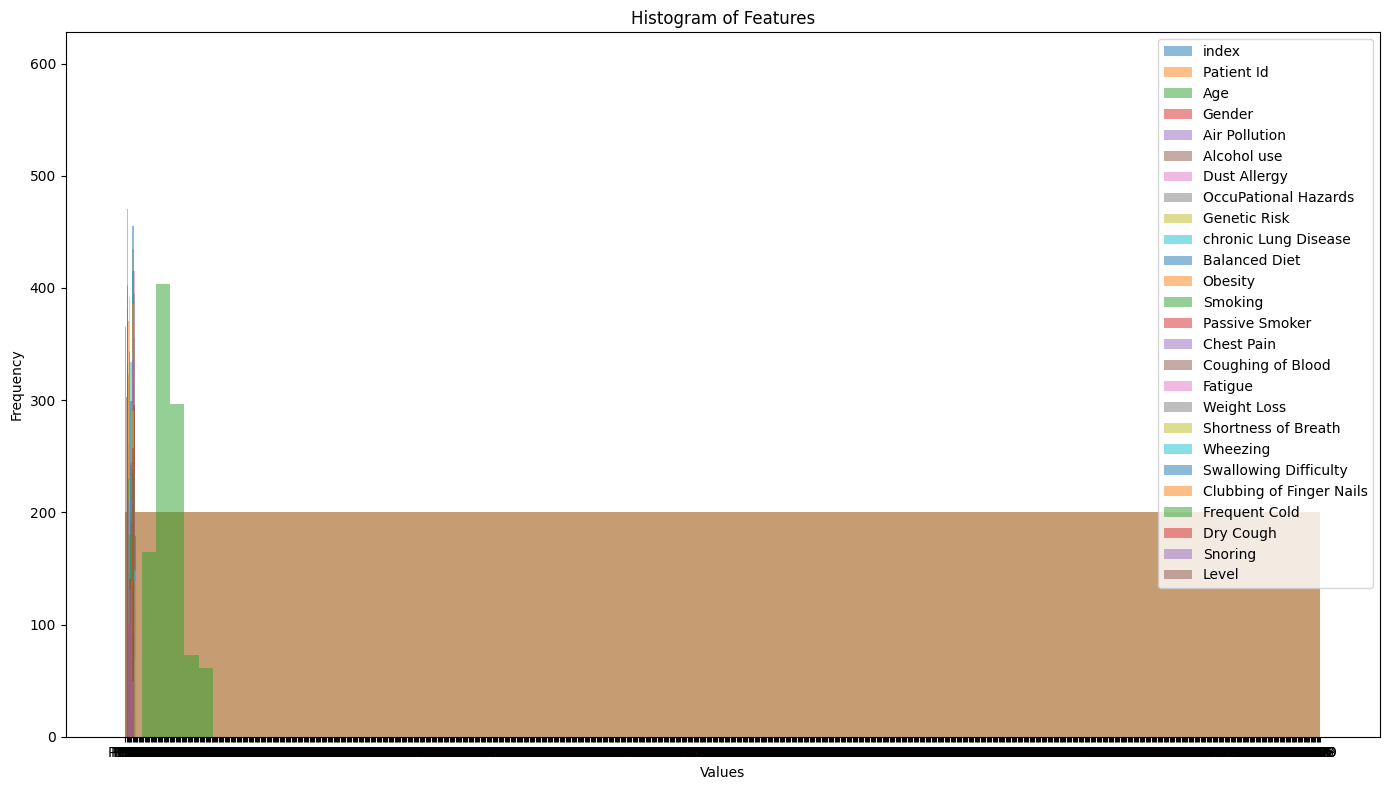

In [39]:
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.hist(data[column], bins=5, alpha=0.5, label=column)
plt.legend()
plt.title('Histogram of Features')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent overlap of histograms
plt.show()


## Data Scaling:

In [43]:
from sklearn.preprocessing import StandardScaler

# Exclude non-numeric columns and columns that are not relevant for modeling
numeric_data = data.drop(['Level', 'Patient Id'], axis=1)

# Scale only the numeric columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

## Extract features X and target y from the dataset:

In [44]:
X = data_scaled
y = data['Level']

## Split X and y into X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN:
Use KNN and find the best K-neighbor value:

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

## Decision Tree
Use decision tree and find the best max depth value:

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)

## Random Forest:
Use random forest to find the best number of estimators and max depth:

In [48]:
# Find the best number of estimators and max depth
best_rf_model = None
best_accuracy = 0

for n_estimators in range(10, 101, 10):
    for max_depth in range(5, 16):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        accuracy = rf.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_rf_model = rf

rf_train_acc = best_rf_model.score(X_train, y_train)
rf_test_acc = best_rf_model.score(X_test, y_test)

## AdaBoost
Use AdaBoost with none in the estimator parameter to find the best value for number of estimators. Use learning_rate = 0.01, Check the website: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [49]:
# Use AdaBoost to find the best value for number of estimators
best_adaboost_model = None
best_accuracy = 0

for n_estimators in range(10, 101, 10):
    adaboost = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=0.01, random_state=42)
    adaboost.fit(X_train, y_train)
    accuracy = adaboost.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_adaboost_model = adaboost

adaboost_train_acc = best_adaboost_model.score(X_train, y_train)
adaboost_test_acc = best_adaboost_model.score(X_test, y_test)

## XGBoost:
Use the slides that uses XGBoost. To install XGBoost, use: pip install xgboost



In [50]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_train_acc = xgb_model.score(X_train, y_train)
xgb_test_acc = xgb_model.score(X_test, y_test)